In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
pip install openpyxl --upgrade --pre

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv(r"C:\Users\Francois\Documents\Simplon\P1 - POEC Data Analyst\P1 - POEC Data Analyst\3. Ressources_cours\Sem 1\Projet - DataScientist\DataScientist.csv")

In [5]:
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [7]:
df = df.drop(columns=['index','Rating','Headquarters', 'Size', 'Founded', 'Type of ownership', 'Revenue', 'Sector', 'Easy Apply', 'Competitors', 'Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3909 non-null   object
 1   Salary Estimate  3909 non-null   object
 2   Job Description  3909 non-null   object
 3   Company Name     3909 non-null   object
 4   Location         3909 non-null   object
 5   Industry         3909 non-null   object
dtypes: object(6)
memory usage: 183.4+ KB


In [8]:
masque = ~df['Salary Estimate'].str.match(r'^\$\d+K-\$\d+K \(.*\)$')

erreurs = df[masque]

print("Nombre de lignes avec un format incorrect :", len(erreurs))

Nombre de lignes avec un format incorrect : 80


In [9]:
df = df[df['Salary Estimate'].str.match(r'^\$\d+K-\$\d+K \(.*\)$')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3829 entries, 0 to 3908
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3829 non-null   object
 1   Salary Estimate  3829 non-null   object
 2   Job Description  3829 non-null   object
 3   Company Name     3829 non-null   object
 4   Location         3829 non-null   object
 5   Industry         3829 non-null   object
dtypes: object(6)
memory usage: 209.4+ KB


In [10]:
df = df[(df['Industry']!= '-1') | (df['Industry']!= -1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3829 entries, 0 to 3908
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3829 non-null   object
 1   Salary Estimate  3829 non-null   object
 2   Job Description  3829 non-null   object
 3   Company Name     3829 non-null   object
 4   Location         3829 non-null   object
 5   Industry         3829 non-null   object
dtypes: object(6)
memory usage: 209.4+ KB


In [11]:
df = df[df['Job Title'].isnull()==False]
df = df[df['Job Description'].isnull()==False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3829 entries, 0 to 3908
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3829 non-null   object
 1   Salary Estimate  3829 non-null   object
 2   Job Description  3829 non-null   object
 3   Company Name     3829 non-null   object
 4   Location         3829 non-null   object
 5   Industry         3829 non-null   object
dtypes: object(6)
memory usage: 209.4+ KB


In [12]:
print(df.isnull().sum())

Job Title          0
Salary Estimate    0
Job Description    0
Company Name       0
Location           0
Industry           0
dtype: int64


In [13]:
pd.options.mode.copy_on_write = True

In [14]:
df.loc[df['Job Title'].str.contains('analyst', case=False), 'Job Title'] = 'Data Analyst'
df.loc[(df['Job Title'].str.contains('scientist', case=False)) | (df['Job Title'].str.contains('science', case=False)), 'Job Title'] = 'Data Scientist'
df.loc[df['Job Title'].str.contains('engineer', case=False), 'Job Title'] = 'Data Engineer'

df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Industry
0,Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies
1,Data Scientist,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness"
2,Data Scientist,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,"New York, NY",-1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet
4,Data Scientist,$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing


In [15]:
df = df[(df['Job Title'] == 'Data Analyst') | (df['Job Title'] == 'Data Scientist') | (df['Job Title'] == 'Data Engineer')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3586 entries, 0 to 3908
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3586 non-null   object
 1   Salary Estimate  3586 non-null   object
 2   Job Description  3586 non-null   object
 3   Company Name     3586 non-null   object
 4   Location         3586 non-null   object
 5   Industry         3586 non-null   object
dtypes: object(6)
memory usage: 196.1+ KB


In [16]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '000')
df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Industry
0,Data Scientist,$111000-$181000 (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies
1,Data Scientist,$111000-$181000 (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness"
2,Data Scientist,$111000-$181000 (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,"New York, NY",-1
3,Data Analyst,$111000-$181000 (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet
4,Data Scientist,$111000-$181000 (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing


In [17]:
df['Estimate Min Salary'] = df['Salary Estimate'].str.split("-").str[0].str.split("$").str[1]
df['Estimate Max Salary'] = df['Salary Estimate'].str.split("-").str[1].str.split(" ").str[0].str.split("$").str[1]

df['Estimate Min Salary'] = df['Estimate Min Salary'].astype(int)
df['Estimate Max Salary'] = df['Estimate Max Salary'].astype(int)

df = df.drop(columns='Salary Estimate')

df.head()

,Job Title,Job Description,Company Name,Location,Industry,Estimate Min Salary,Estimate Max Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies,111000,181000
1,Data Scientist,"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",111000,181000
2,Data Scientist,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,"New York, NY",-1,111000,181000
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,111000,181000
4,Data Scientist,"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,111000,181000


In [18]:
df['Company Name'] = df['Company Name'].str.split("\n").str[0]

df['Location'] = df['Location'].str.split(",").str[0]

df.head()

,Job Title,Job Description,Company Name,Location,Industry,Estimate Min Salary,Estimate Max Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper,New York,Travel Agencies,111000,181000
1,Data Scientist,"At Noom, we use scientifically proven methods ...",Noom US,New York,"Health, Beauty, & Fitness",111000,181000
2,Data Scientist,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,New York,-1,111000,181000
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital,Lyndhurst,Internet,111000,181000
4,Data Scientist,"Director, Data Science - (200537)\nDescription...",United Entertainment Group,New York,Advertising & Marketing,111000,181000


In [19]:
postes_sql = df['Job Description'].str.contains('sql', case=False).sum()
postes_python = df['Job Description'].str.contains('python', case=False).sum()
postes_powerbi = df['Job Description'].str.contains('power bi', case=False).sum()
postes_tableau = df['Job Description'].str.contains('tableau', case=False).sum()
postes_excel = df['Job Description'].str.contains('excel', case=False).sum()
postes_r = df['Job Description'].str.contains(' r ', case=False).sum()

total = [postes_sql, postes_python, postes_powerbi, postes_tableau, postes_excel, postes_r]
print(total)

[np.int64(1842), np.int64(1927), np.int64(186), np.int64(611), np.int64(1688), np.int64(286)]


In [20]:
df1 = df[['Job Title', 'Job Description']].copy()

df1.insert(0, 'r', 0)
df1.insert(0, 'excel', 0)
df1.insert(0, 'tableau', 0)
df1.insert(0, 'power bi', 0)
df1.insert(0, 'python', 0)
df1.insert(0, 'sql', 0)

df1.head()

,sql,python,power bi,tableau,excel,r,Job Title,Job Description
0,0,0,0,0,0,0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,0,0,0,0,0,0,Data Scientist,"At Noom, we use scientifically proven methods ..."
2,0,0,0,0,0,0,Data Scientist,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,0,0,0,0,0,0,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...
4,0,0,0,0,0,0,Data Scientist,"Director, Data Science - (200537)\nDescription..."


In [21]:
print(df1.isnull().sum())

sql                0
python             0
power bi           0
tableau            0
excel              0
r                  0
Job Title          0
Job Description    0
dtype: int64


In [22]:
df1.loc[df1['Job Description'].str.contains('sql', case=False), 'sql'] = 1
df1.loc[df1['Job Description'].str.contains('python', case=False), 'python'] = 1
df1.loc[df1['Job Description'].str.contains('power bi', case=False), 'power bi'] = 1
df1.loc[df1['Job Description'].str.contains('tableau', case=False), 'tableau'] = 1
df1.loc[df1['Job Description'].str.contains('excel', case=False), 'excel'] = 1
df1.loc[df1['Job Description'].str.contains(' r ', case=False), 'r'] = 1

df1.head()

,sql,python,power bi,tableau,excel,r,Job Title,Job Description
0,1,0,0,1,0,0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,1,1,0,0,1,0,Data Scientist,"At Noom, we use scientifically proven methods ..."
2,0,1,0,0,1,0,Data Scientist,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,1,1,0,0,1,0,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...
4,0,1,0,0,1,0,Data Scientist,"Director, Data Science - (200537)\nDescription..."


In [23]:
df_new = df1.drop('Job Description', axis=1)

df_final = df_new.groupby(df_new['Job Title']).sum()
df_final.head()

,sql,python,power bi,tableau,excel,r
Job Title,,,,,,
Data Analyst,571,268,96,274,532,63
Data Engineer,573,612,47,134,282,43
Data Scientist,698,1047,43,203,874,180


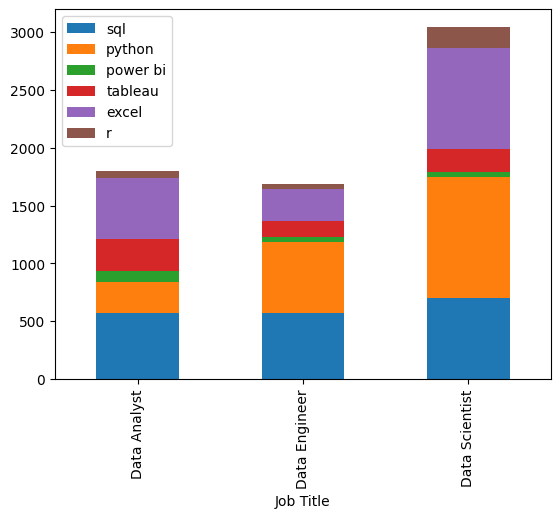

In [24]:
df_final.plot(kind='bar', stacked=True)
plt.show()

array([<Axes: ylabel='Data Analyst'>], dtype=object)

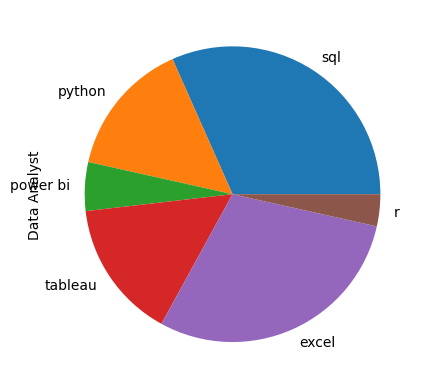

In [25]:
df_final.iloc[0].plot(kind='pie', subplots=True)

array([<Axes: ylabel='Data Engineer'>], dtype=object)

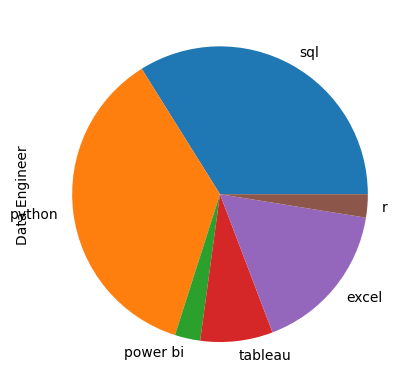

In [26]:
df_final.iloc[1].plot(kind='pie', subplots=True)

array([<Axes: ylabel='Data Scientist'>], dtype=object)

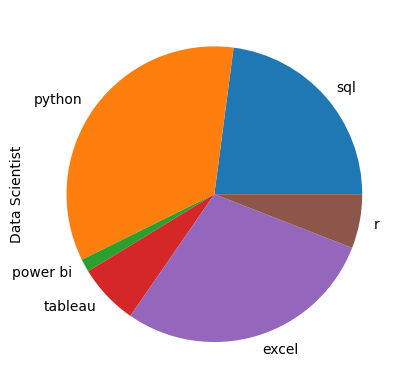

In [27]:
df_final.iloc[2].plot(kind='pie', subplots=True)

<Axes: >

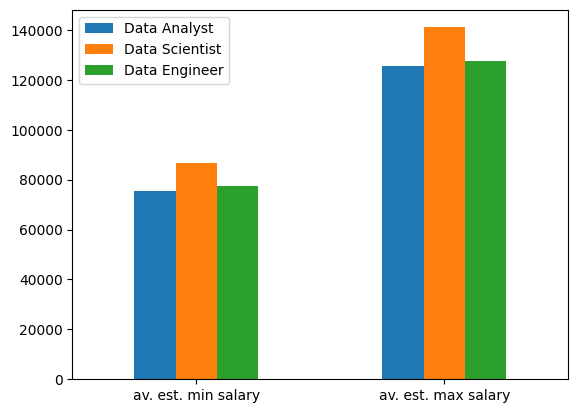

In [28]:
moyenne_min_DA = df['Estimate Min Salary'][df['Job Title'] == 'Data Analyst'].mean()
moyenne_min_DS = df['Estimate Min Salary'][df['Job Title'] == 'Data Scientist'].mean()
moyenne_min_DE = df['Estimate Min Salary'][df['Job Title'] == 'Data Engineer'].mean()

moyenne_max_DA = df['Estimate Max Salary'][df['Job Title'] == 'Data Analyst'].mean()
moyenne_max_DS = df['Estimate Max Salary'][df['Job Title'] == 'Data Scientist'].mean()
moyenne_max_DE = df['Estimate Max Salary'][df['Job Title'] == 'Data Engineer'].mean()

moyennes_min = [moyenne_min_DA, moyenne_min_DS, moyenne_min_DE]
moyennes_max = [moyenne_max_DA, moyenne_max_DS, moyenne_max_DE]

data = {'Data Analyst':[moyenne_min_DA, moyenne_max_DA], 'Data Scientist':[moyenne_min_DS, moyenne_max_DS], 'Data Engineer':[moyenne_min_DE, moyenne_max_DE]}
data_index = ['av. est. min salary', 'av. est. max salary']

df_jobs = pd.DataFrame(data, index=data_index)

df_jobs.plot.bar(rot=0)

In [29]:
df['Estimate Min Salary'][df['Job Title'] == 'Data Analyst'].describe()

count       873.000000
mean      75395.189003
std       33016.236272
min       12000.000000
25%       48000.000000
50%       71000.000000
75%       97000.000000
max      156000.000000
Name: Estimate Min Salary, dtype: float64

In [30]:
df['Estimate Max Salary'][df['Job Title'] == 'Data Analyst'].describe()

count       873.000000
mean     125643.757159
std       44368.326588
min       56000.000000
25%       87000.000000
50%      117000.000000
75%      159000.000000
max      254000.000000
Name: Estimate Max Salary, dtype: float64

In [31]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install --upgrade pandas ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [34]:
from ydata_profiling import ProfileReport

In [35]:
profile = ProfileReport(df, title="Data Science Project")

In [36]:
profile.to_file("Data_Science_Project.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]